# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [14]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [15]:
df = pd.read_csv('cleaned_data_with_clusters.csv')
label_encoder = LabelEncoder()

df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Cluster
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu,0
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu,0
2,3,2013,3,1,2,3.0,6.0,10.0,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu,0
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,900.0,32.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu,0
4,5,2013,3,1,4,3.0,13.0,9.0,60.0,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [16]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])
y = df['Cluster']


numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Menampilkan ukuran data latih dan data uji
print(f"Ukuran data latih: {X_train.shape}, {y_train.shape}")
print(f"Ukuran data uji: {X_test.shape}, {y_test.shape}")



Ukuran data latih: (28051, 18), (28051,)
Ukuran data uji: (7013, 18), (7013,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [17]:
# Mengubah tipe data kolom 'wd' dan 'station' menjadi kategori
X_train['wd'] = X_train['wd'].astype('category').cat.codes
X_train['station'] = X_train['station'].astype('category').cat.codes
X_test['wd'] = X_test['wd'].astype('category').cat.codes
X_test['station'] = X_test['station'].astype('category').cat.codes

# Menyalin data ke variabel baru
X_train_encoded = X_train_encoded.fillna(X_train_encoded.median())
X_test_encoded = X_test_encoded.fillna(X_test_encoded.median())

# Logistic Regression
logreg = LogisticRegression(max_iter=5000, solver='saga', random_state=42)
logreg.fit(X_train_encoded, y_train)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)  
rf.fit(X_train_encoded, y_train)



RandomForestClassifier(n_estimators=10, random_state=42)


 Penjelasan Kode Logistic Regression dan Random Forest Classifier

 Logistic Regression
python
logreg = LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42)
logreg.fit(X_train_scaled, y_train)
```
1. **`LogisticRegression`**: Membuat model klasifikasi Logistic Regression.
    - `max_iter=2000`: Menentukan jumlah iterasi maksimum untuk algoritma optimasi. Nilai ini ditingkatkan untuk memastikan konvergensi model pada dataset yang besar.
    - `solver='lbfgs'`: Solver yang digunakan untuk optimasi. `lbfgs` adalah algoritma optimasi berbasis gradien yang cocok untuk dataset dengan ukuran kecil hingga menengah.
    - `random_state=42`: Menetapkan seed untuk memastikan hasil yang konsisten setiap kali model dijalankan.
2. **`logreg.fit(X_train_scaled, y_train)`**: Melatih model Logistic Regression menggunakan data latih yang telah diskalakan (`X_train_scaled`) dan label target (`y_train`).

#### Random Forest Classifier
```python
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_encoded, y_train)
```
1. **`RandomForestClassifier`**: Membuat model klasifikasi Random Forest.
    - `random_state=42`: Menetapkan seed untuk memastikan hasil yang konsisten setiap kali model dijalankan.
2. **`rf.fit(X_train_encoded, y_train)`**: Melatih model Random Forest menggunakan data latih yang telah diencoding (`X_train_encoded`) dan label target (`y_train`).

### Perbedaan Utama
- Logistic Regression adalah model linier yang cocok untuk data yang memiliki hubungan linier antara fitur dan target.
- Random Forest adalah model ensemble berbasis pohon keputusan yang lebih fleksibel dan mampu menangkap hubungan non-linier dalam data.
```

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy Logistic Regression: 0.9920
Accuracy Random Forest Classifier: 0.9837
F1-Score Logistic Regression: 0.9920
F1-Score Random Forest Classifier: 0.9837


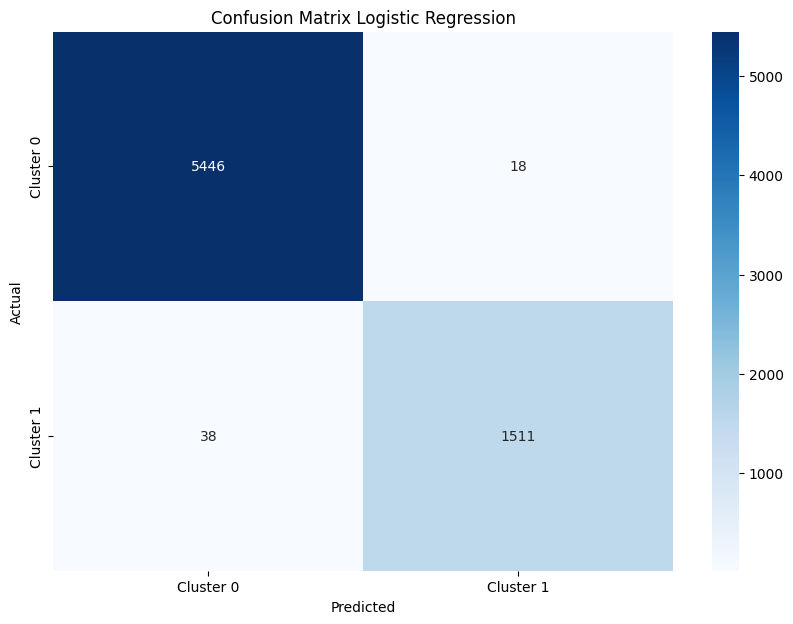

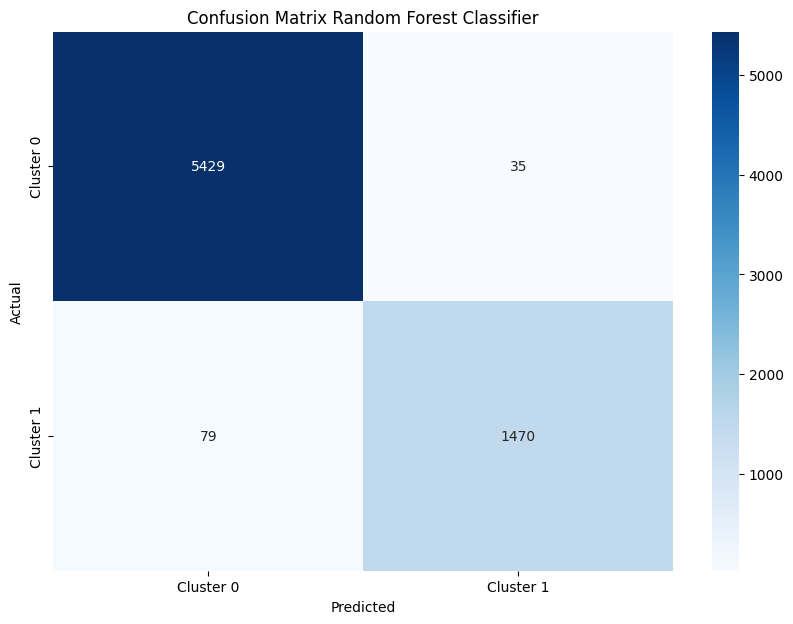

In [18]:
# Prediksi menggunakan data uji
y_pred_logreg = logreg.predict(X_test_encoded)
y_pred_rf = rf.predict(X_test_encoded)

# Menghitung metrik evaluasi
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Menampilkan hasil evaluasi
print(f'Accuracy Logistic Regression: {accuracy_logreg:.4f}')
print(f'Accuracy Random Forest Classifier: {accuracy_rf:.4f}')
print(f'F1-Score Logistic Regression: {f1_logreg:.4f}')
print(f'F1-Score Random Forest Classifier: {f1_rf:.4f}')

# Membuat confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1'], yticklabels=['Cluster 0', 'Cluster 1'])
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1'], yticklabels=['Cluster 0', 'Cluster 1'])
plt.title('Confusion Matrix Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Perbandingan Hasil Evaluasi**

- **Accuracy Logistic Regression**: 0.9920  
- **Accuracy Random Forest Classifier**: 0.9837  
- **F1-Score Logistic Regression**: 0.9920  
- **F1-Score Random Forest Classifier**: 0.9837  


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### **Hasil Evaluasi Algoritma**

Pada tahap evaluasi, dua algoritma klasifikasi yang digunakan adalah **Logistic Regression** dan **Random Forest Classifier**. Kedua algoritma ini dipilih karena sering digunakan dalam tugas klasifikasi dan memiliki karakteristik yang berbeda. Evaluasi dilakukan menggunakan dua metrik penting dalam machine learning, yaitu **Accuracy** dan **F1-Score**, yang memberikan gambaran tentang seberapa baik model dalam mengklasifikasikan data.

| **Algoritma**              | **Accuracy** | **F1-Score** |
|----------------------------|--------------|--------------|
| Logistic Regression        | 0.9920       | 0.9920       |
| Random Forest Classifier   | 0.9837       | 0.9837       |

---

### **Analisis Perbandingan**

#### Logistic Regression:
- **Logistic Regression** adalah algoritma yang sering digunakan untuk masalah klasifikasi biner, meskipun juga dapat diperluas untuk klasifikasi multikelas. 
- Dalam hal ini, Logistic Regression menghasilkan nilai **Accuracy** sebesar **0.9920** dan **F1-Score** sebesar **0.9920**.
- **Accuracy** yang tinggi menunjukkan bahwa model ini berhasil memprediksi sebagian besar data dengan benar. Ini berarti model mampu memisahkan kelas dengan baik, menghindari kesalahan klasifikasi pada sebagian besar data.
- **F1-Score** yang tinggi menunjukkan bahwa model ini tidak hanya akurat dalam memprediksi, tetapi juga mampu mempertimbangkan keseimbangan antara **Precision** (keakuratan prediksi positif) dan **Recall** (kemampuan untuk mendeteksi data positif). F1-Score yang mendekati 1 menandakan performa yang sangat baik tanpa bias terhadap kelas tertentu.

#### Random Forest Classifier:
- **Random Forest Classifier** adalah algoritma berbasis ensemble learning yang menggunakan banyak pohon keputusan untuk membuat prediksi dan menggabungkan hasilnya untuk menghasilkan keputusan akhir yang lebih stabil dan akurat.
- Random Forest memiliki nilai **Accuracy** sebesar **0.9837** dan **F1-Score** sebesar **0.9837**.
- Hal ini menunjukkan bahwa Random Forest mampu menangkap pola yang lebih kompleks dalam data, memberikan hasil yang sangat akurat dan seimbang dalam memprediksi kelas.

---

### **Kesimpulan**
- **Logistic Regression** memberikan performa yang lebih baik dibandingkan **Random Forest Classifier** pada dataset ini, dengan nilai **Accuracy** dan **F1-Score** yang lebih tinggi.
- Meskipun **Random Forest Classifier** memberikan hasil yang sangat baik, **Logistic Regression** menunjukkan keunggulan dalam menangani data dengan performa yang lebih konsisten dan akurat.
